In [51]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Ignore warnings for clean output
# import warnings
# warnings.filterwarnings("ignore")

In [53]:
# Load dataset
df = pd.read_csv("cricket.csv")

# Display first 5 rows
df.head()

,Unnamed: 0,Match ID,Date,Venue,Bat First,Bat Second,Innings,Over,Ball,Batter,...,Winner,Chased Successfully,Total Batter Runs,Total Non Striker Runs,Batter Balls Faced,Non Striker Balls Faced,Player Out Runs,Player Out Balls Faced,Bowler Runs Conceded,Valid Ball
0,0,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,1,BA King,...,South Africa,1,1,0,1,0,NaN,NaN,1,1
1,1,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,2,KR Mayers,...,South Africa,1,1,1,1,1,NaN,NaN,1,1
2,2,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,3,BA King,...,South Africa,1,0,1,0,1,1.0,2.0,0,1
3,3,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,4,J Charles,...,South Africa,1,0,1,1,1,NaN,NaN,0,1
4,4,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,5,J Charles,...,South Africa,1,4,1,2,1,NaN,NaN,4,1


In [55]:
# Basic dataset information
df.info()

# Statistical summary
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425119 entries, 0 to 425118
Data columns (total 35 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               425119 non-null  int64  
 1   Match ID                 425119 non-null  int64  
 2   Date                     425119 non-null  object 
 3   Venue                    425119 non-null  object 
 4   Bat First                425119 non-null  object 
 5   Bat Second               425119 non-null  object 
 6   Innings                  425119 non-null  int64  
 7   Over                     425119 non-null  int64  
 8   Ball                     425119 non-null  int64  
 9   Batter                   425119 non-null  object 
 10  Non Striker              425119 non-null  object 
 11  Bowler                   425119 non-null  object 
 12  Batter Runs              425119 non-null  int64  
 13  Extra Runs               425119 non-null  int64  
 14  Runs

,Unnamed: 0,Match ID,Date,Venue,Bat First,Bat Second,Innings,Over,Ball,Batter,...,Winner,Chased Successfully,Total Batter Runs,Total Non Striker Runs,Batter Balls Faced,Non Striker Balls Faced,Player Out Runs,Player Out Balls Faced,Bowler Runs Conceded,Valid Ball
count,425119.000000,4.251190e+05,425119,425119,425119,425119,425119.000000,425119.000000,425119.000000,425119,...,425119,425119.000000,425119.00000,425119.000000,425119.000000,425119.000000,23659.000000,23659.000000,425119.000000,425119.000000
unique,NaN,NaN,1115,183,96,95,NaN,NaN,NaN,2899,...,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,2022-07-15,Dubai International Cricket Stadium,Pakistan,Pakistan,NaN,NaN,NaN,V Kohli,...,Pakistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1848,20388,26344,23221,NaN,NaN,NaN,2798,...,31054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,212559.000000,1.089415e+06,NaN,NaN,NaN,NaN,1.471172,9.959395,3.486377,NaN,...,NaN,0.483994,14.71182,13.952406,12.486560,12.138455,15.386280,13.853502,1.187710,0.959811
std,122721.428881,3.224052e+05,NaN,NaN,NaN,NaN,0.499169,5.633134,1.708903,NaN,...,NaN,0.499744,16.64172,15.976979,11.475981,11.336384,17.408768,11.983127,1.539459,0.196402
min,0.000000,2.110280e+05,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,NaN,...,NaN,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,106279.500000,9.513730e+05,NaN,NaN,NaN,NaN,1.000000,5.000000,2.000000,NaN,...,NaN,0.000000,2.00000,2.000000,4.000000,3.000000,2.000000,5.000000,0.000000,1.000000
50%,212559.000000,1.233980e+06,NaN,NaN,NaN,NaN,1.000000,10.000000,3.000000,NaN,...,NaN,0.000000,9.00000,8.000000,9.000000,9.000000,9.000000,10.000000,1.000000,1.000000
75%,318838.500000,1.310948e+06,NaN,NaN,NaN,NaN,2.000000,15.000000,5.000000,NaN,...,NaN,1.000000,21.00000,20.000000,18.000000,18.000000,22.000000,20.000000,1.000000,1.000000


In [57]:
# Show column names
df.columns

Index(['Unnamed: 0', 'Match ID', 'Date', 'Venue', 'Bat First', 'Bat Second',
       'Innings', 'Over', 'Ball', 'Batter', 'Non Striker', 'Bowler',
       'Batter Runs', 'Extra Runs', 'Runs From Ball', 'Ball Rebowled',
       'Extra Type', 'Wicket', 'Method', 'Player Out', 'Innings Runs',
       'Innings Wickets', 'Target Score', 'Runs to Get', 'Balls Remaining',
       'Winner', 'Chased Successfully', 'Total Batter Runs',
       'Total Non Striker Runs', 'Batter Balls Faced',
       'Non Striker Balls Faced', 'Player Out Runs', 'Player Out Balls Faced',
       'Bowler Runs Conceded', 'Valid Ball'],
      dtype='object')

In [59]:
# Drop unnecessary columns
df = df.drop(columns=[
    'Unnamed: 0', 
    'Match ID', 
    'Date'
])

df.head()

,Venue,Bat First,Bat Second,Innings,Over,Ball,Batter,Non Striker,Bowler,Batter Runs,...,Winner,Chased Successfully,Total Batter Runs,Total Non Striker Runs,Batter Balls Faced,Non Striker Balls Faced,Player Out Runs,Player Out Balls Faced,Bowler Runs Conceded,Valid Ball
0,SuperSport Park,West Indies,South Africa,1,1,1,BA King,KR Mayers,WD Parnell,1,...,South Africa,1,1,0,1,0,NaN,NaN,1,1
1,SuperSport Park,West Indies,South Africa,1,1,2,KR Mayers,BA King,WD Parnell,1,...,South Africa,1,1,1,1,1,NaN,NaN,1,1
2,SuperSport Park,West Indies,South Africa,1,1,3,BA King,KR Mayers,WD Parnell,0,...,South Africa,1,0,1,0,1,1.0,2.0,0,1
3,SuperSport Park,West Indies,South Africa,1,1,4,J Charles,KR Mayers,WD Parnell,0,...,South Africa,1,0,1,1,1,NaN,NaN,0,1
4,SuperSport Park,West Indies,South Africa,1,1,5,J Charles,KR Mayers,WD Parnell,4,...,South Africa,1,4,1,2,1,NaN,NaN,4,1


In [61]:
# Define target variable
y = df['Chased Successfully']

# Define feature set
X = df.drop(columns=['Chased Successfully', 'Winner'])

In [63]:
# Copy data to avoid warnings
X_encoded = X.copy()

# Encode categorical columns
label_encoder = LabelEncoder()

for col in X_encoded.select_dtypes(include='object').columns:
    X_encoded[col] = label_encoder.fit_transform(X_encoded[col].astype(str))

# Encode target variable
y_encoded = label_encoder.fit_transform(y.astype(str))

X_encoded.head()

,Venue,Bat First,Bat Second,Innings,Over,Ball,Batter,Non Striker,Bowler,Batter Runs,...,Runs to Get,Balls Remaining,Total Batter Runs,Total Non Striker Runs,Batter Balls Faced,Non Striker Balls Faced,Player Out Runs,Player Out Balls Faced,Bowler Runs Conceded,Valid Ball
0,151,94,79,1,1,1,420,1377,2065,1,...,NaN,119,1,0,1,0,NaN,NaN,1,1
1,151,94,79,1,1,2,1390,418,2065,1,...,NaN,118,1,1,1,1,NaN,NaN,1,1
2,151,94,79,1,1,3,420,1377,2065,0,...,NaN,117,0,1,0,1,1.0,2.0,0,1
3,151,94,79,1,1,4,1131,1377,2065,0,...,NaN,116,0,1,1,1,NaN,NaN,0,1
4,151,94,79,1,1,5,1131,1377,2065,4,...,NaN,115,4,1,2,1,NaN,NaN,4,1


In [65]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded,
    test_size=0.2,
    random_state=42
)

In [67]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [71]:
# Check class distribution in full target
print("Full target distribution:")
print(pd.Series(y_encoded).value_counts())

print("\nTraining target distribution:")
print(pd.Series(y_train).value_counts())

Full target distribution:
0    219364
1    205755
Name: count, dtype: int64

Training target distribution:
0    175516
1    164579
Name: count, dtype: int64


In [75]:
# Check for NaN values
print("NaN values per column:")
print(X_train.isna().sum().sort_values(ascending=False).head(10))

# Check for infinite values
print("\nInfinite values:", np.isinf(X_train).sum().sum())

NaN values per column:
Player Out Balls Faced     321187
Player Out Runs            321187
Runs to Get                179906
Venue                           0
Bat First                       0
Bowler Runs Conceded            0
Non Striker Balls Faced         0
Batter Balls Faced              0
Total Non Striker Runs          0
Total Batter Runs               0
dtype: int64

Infinite values: 0


In [77]:
# Replace NaN and infinite values
X_encoded = X_encoded.replace([np.inf, -np.inf], np.nan)
X_encoded = X_encoded.fillna(0)

# Re-split (important after cleaning)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

In [79]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [81]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

y_pred_lr = log_reg.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
# yo screenshot hanne ho hai 

Logistic Regression Accuracy: 0.7445074331953331
              precision    recall  f1-score   support

           0       0.75      0.76      0.76     43873
           1       0.74      0.72      0.73     41151

    accuracy                           0.74     85024
   macro avg       0.74      0.74      0.74     85024
weighted avg       0.74      0.74      0.74     85024



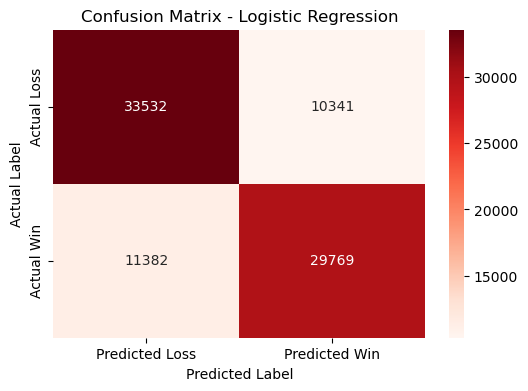

In [97]:
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Reds",
    xticklabels=["Predicted Loss", "Predicted Win"],
    yticklabels=["Actual Loss", "Actual Win"]
)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()
# yo pani screenshot hanne ho hai 

In [99]:
# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(
    criterion="gini",      # standard choice
    max_depth=10,          # prevents overfitting (important)
    random_state=42
)

# Train the model
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)

# Evaluation
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
# yo pani screenshot

Decision Tree Accuracy: 0.864450037636432
              precision    recall  f1-score   support

           0       0.90      0.83      0.86     43873
           1       0.83      0.90      0.87     41151

    accuracy                           0.86     85024
   macro avg       0.87      0.87      0.86     85024
weighted avg       0.87      0.86      0.86     85024



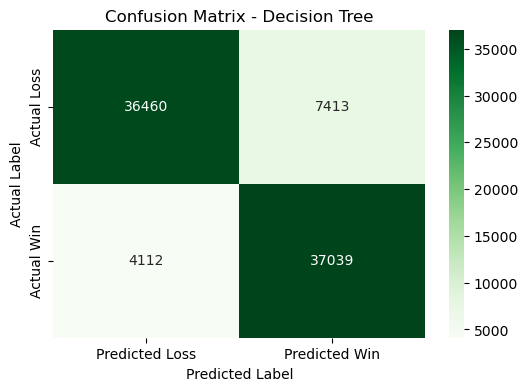

In [107]:
# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(6, 4))
sns.heatmap(
    cm_dt,
    annot=True,
    fmt="d",
    cmap="Greens",
    xticklabels=["Predicted Loss", "Predicted Win"],
    yticklabels=["Actual Loss", "Actual Win"]
)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Decision Tree")
plt.show()
# yo pani screenshot

In [109]:
# Initialize k-NN model
knn_model = KNeighborsClassifier(
    n_neighbors=5,      # standard starting value
    metric='euclidean'
)

# Train model
knn_model.fit(X_train_scaled, y_train)

# Predict
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluation
print("k-NN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
# yo pani screenshot

k-NN Accuracy: 0.8442086940158073
              precision    recall  f1-score   support

           0       0.85      0.85      0.85     43873
           1       0.84      0.83      0.84     41151

    accuracy                           0.84     85024
   macro avg       0.84      0.84      0.84     85024
weighted avg       0.84      0.84      0.84     85024



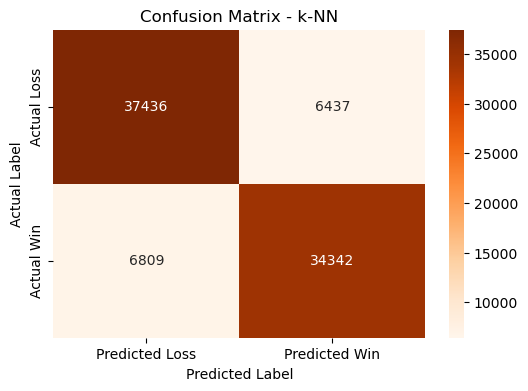

In [113]:
# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(6, 4))
sns.heatmap(
    cm_knn,
    annot=True,
    fmt="d",
    cmap="Oranges",
    xticklabels=["Predicted Loss", "Predicted Win"],
    yticklabels=["Actual Loss", "Actual Win"]
)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - k-NN")
plt.show()
# yo pani screenshot

In [115]:
# Create comparison table
comparison_df = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "Decision Tree",
        "k-Nearest Neighbours"
    ],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_knn)
    ]
})

comparison_df

,Model,Accuracy
0,Logistic Regression,0.744507
1,Decision Tree,0.864450
2,k-Nearest Neighbours,0.844209


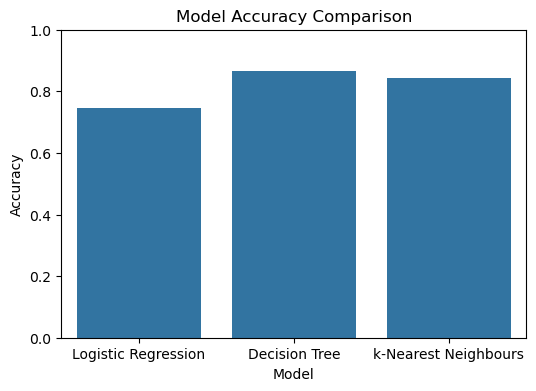

In [117]:
plt.figure(figsize=(6, 4))
sns.barplot(x="Model", y="Accuracy", data=comparison_df)
plt.ylim(0, 1)
plt.title("Model Accuracy Comparison")
plt.show()